<a href="https://colab.research.google.com/github/a151815058/jourdeness_project_homework/blob/main/HW2_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format',lambda x: '%.2f'%x)


In [18]:
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/佐登妮絲/青年計劃/data3_project.csv',index_col=False)
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [19]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


### 1. 請畫出每個區域的收入分佈圖(條狀圖)​

#### 計算Revenue

In [20]:
sales_data['Revenue'] = sales_data['UnitPrice'] * sales_data['Quantity']

In [21]:
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00


In [22]:
tx_area_revenue = sales_data.groupby('Country')['Revenue'].sum().reset_index()

tx_area_revenue

,Country,Revenue
0,中區,27090085264.00
1,佐登微爾,1162010224.00
2,南區,11744425776.00
3,台北A區,19484600856.00
4,台北B區,14601542728.00
5,彰雲區,12644608784.00
6,竹區,10969466880.00
7,總管理處,2754973920.00
8,高屏全區,16528814024.00


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30331 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29246 missing from current font.
  font.set_

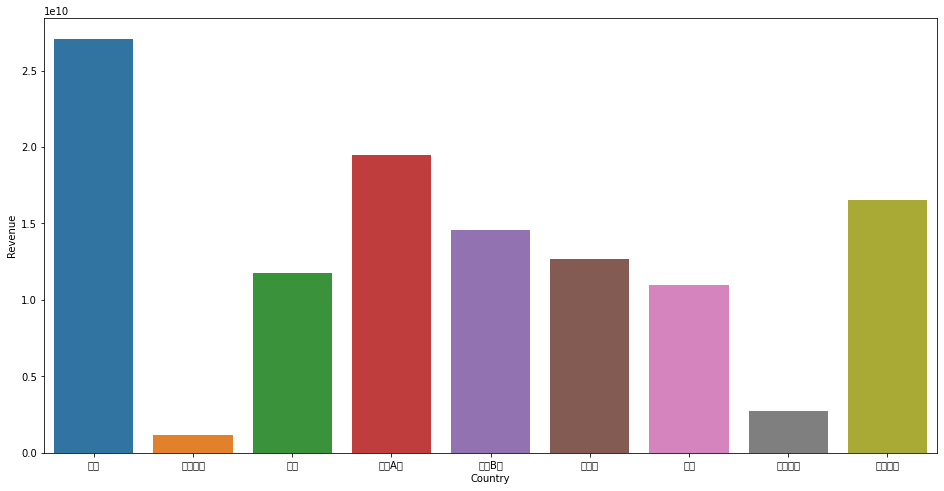

In [23]:
fig,axes = plt.subplots(figsize=(16,8))
sns.barplot(x='Country',y='Revenue',data =tx_area_revenue,ax=axes )
plt.show()

### 2. 這些銷售資料裡，請找出銷售最好的產品（或課程），並用圓餅圖的方式與折線圖的方式呈現在每個地區的收入分佈狀況​

#### 找出銷售最好的產品（或課程）

In [25]:
best_stock = sales_data.groupby('StockCode')['Revenue'].sum().reset_index()
best_stock.sort_values(by='Revenue',ascending=False)

,StockCode,Revenue
413,HB95A01,12283903592.00
407,HB90A01,11000639864.00
370,HA86A01,4827510168.00
446,HE58A02,4569065280.00
375,HA90A01,4530077968.00
...,...,...
870,ZCP01,472.00
807,W0040,472.00
120,ENDA01E003,472.00
874,ZOR02,472.00


#### 列出sales_data中含有ZOR02的交易

In [26]:
best_stock_sales_data = sales_data.loc[sales_data['StockCode'].isin(['HB95A01'])]
best_stock_sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
80435,PS5329001874,HB95A01,全身健康優化SPA課程單堂,8.00,2019-02-28,985.00,9100001700007.00,中區,2014-03-04,2014-03-04,7880.00
80438,PS5329001875,HB95A01,全身健康優化SPA課程單堂,8.00,2019-02-28,985.00,9100000366754.00,中區,2002-11-11,2012-08-09,7880.00
80487,PS5330018753,HB95A01,全身健康優化SPA課程單堂,8.00,2019-02-28,985.00,9100000066425.00,中區,2001-08-01,2012-08-07,7880.00
82483,PS5553016468,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100001439358.00,高屏全區,2012-10-31,2012-10-31,7880.00
82485,PS5553016469,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100000247824.00,高屏全區,2005-01-24,2012-11-06,7880.00
...,...,...,...,...,...,...,...,...,...,...,...
1403583,PS5117030690,HB95A01,全身健康優化SPA課程單堂,16.00,2020-12-31,3659.00,9100002566596.00,台北B區,2018-11-08,2018-11-08,58544.00
1403943,PS5444012976,HB95A01,全身健康優化SPA課程單堂,16.00,2020-12-31,3659.00,9100002020029.00,南區,2015-12-19,2015-12-19,58544.00
1404016,PS5441025945,HB95A01,全身健康優化SPA課程單堂,16.00,2020-12-31,3659.00,9100001309859.00,南區,2006-07-21,2012-12-19,58544.00
1404117,PS5360027480,HB95A01,全身健康優化SPA課程單堂,88.00,2020-12-31,18859.00,9100000095883.00,彰雲區,2005-03-10,2012-10-06,1659592.00


In [27]:
best_stock_area_revenue = best_stock_sales_data.groupby('Country')['Revenue'].sum().reset_index()
best_stock_area_revenue

,Country,Revenue
0,中區,2294907384.00
1,南區,1503622328.00
2,台北A區,2919231200.00
3,台北B區,1482331144.00
4,彰雲區,1323694072.00
5,竹區,1081002656.00
6,總管理處,944.00
7,高屏全區,1679113864.00


#### 折線圖

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24432 missing from current font.
  font.set_

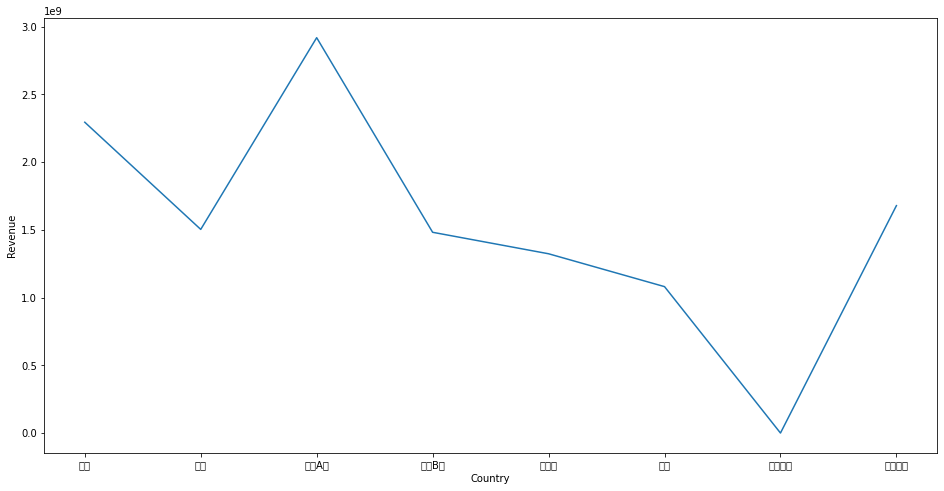

In [28]:
fig,axes = plt.subplots(figsize=(16,8))
sns.lineplot(x='Country',y='Revenue',data = best_stock_area_revenue,ax=axes)
plt.show()

#### 圓餅圖

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24432 missing from current font.
  font.set_

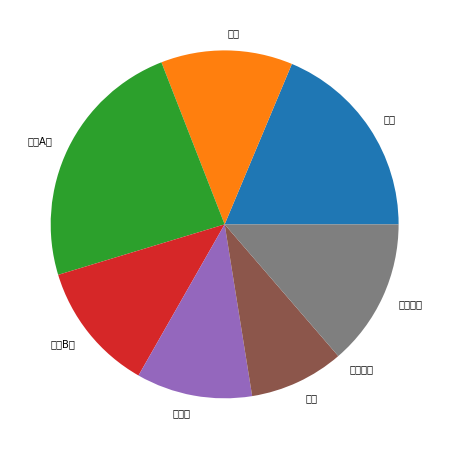

In [29]:
fig,axes = plt.subplots(figsize=(16,8))
plt.pie(best_stock_area_revenue['Revenue'], labels = best_stock_area_revenue['Country']) # 繪製圓餅圖
plt.show() # 顯現圖形 

### 3. 請用折線圖展示春、夏、秋、東每個季節購買的人數與收入​

In [30]:
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])

In [32]:
sales_data['Month'] = sales_data['InvoiceDate'].dt.month 
sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,1
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00,1
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,12
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,12
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,12
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,12


#### 加上季節

In [35]:
sales_data['season'] = 'spring'
sales_data.loc[sales_data['Month'].isin([6,7,8]),'season'] = 'summer' 
sales_data.loc[sales_data['Month'].isin([9,10,11]),'season'] = 'autumn' 
sales_data.loc[sales_data['Month'].isin([12,1,1]),'season'] = 'winter' 
sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month,season
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,1,winter
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1,winter
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1,winter
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00,1,winter
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,1,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,12,winter
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,12,winter
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,12,winter
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,12,winter


In [37]:
tx_season_revenue = sales_data.groupby('season')['Revenue'].sum().reset_index()
tx_season_revenue

,season,Revenue
0,autumn,29725384568.00
1,spring,36905492088.00
2,summer,29016599032.00
3,winter,21333052768.00


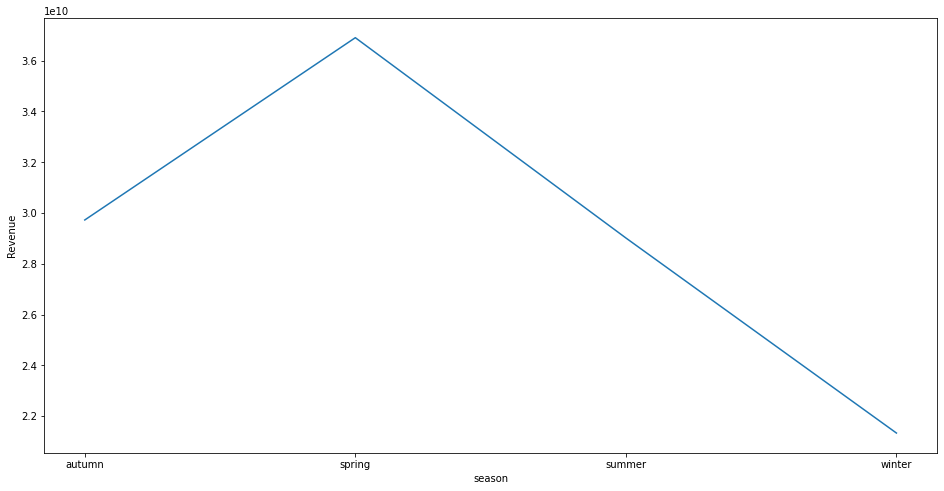

In [38]:
fig,axes = plt.subplots(figsize=(16,8))
sns.lineplot(x='season',y='Revenue',data = tx_season_revenue,ax=axes)
plt.show()